In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

<h3>Генерация данных</h3>

In [101]:
RSEED = 42
data, labels = make_blobs(n_samples = 200, centers = 4, cluster_std = 3.0, random_state = RSEED)

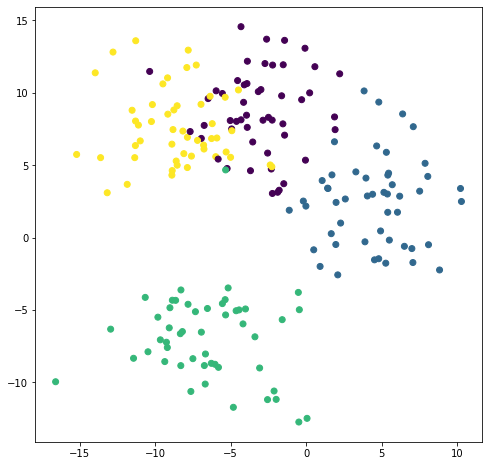

In [102]:
plt.figure(figsize = (8, 8))
plt.scatter(data[:, 0], data[:, 1], c = labels)

In [103]:
from sklearn.metrics.pairwise import euclidean_distances

class Kmeans:
    def fit(self, X, k, init = 'random', track_history = False):
        self.iters_count = 0
        if init == 'random':
            self.centroids = X[np.random.choice(len(X), k)]  # Случайно инициализируем центроиды(берем рандомные точки)
        #elif init = 'kmeans++':
        else:
            raise ValueError('Wrong initialization type')
        if  track_history:
            self.history = {'centroids': [self.centroids], 'clusters': []}
            
                                       
    
        has_converged = False  # Сначала сходимость = ложь
           
        
        # Основной цикл алгоритма
        while not has_converged:
            cluster_assigment = self.labels_assigment(X)  # по центроидам определяем кластеры
            new_centroids = self.centroids_assigment(cluster_assigment, X, k)  # пересчитываем центроиды
            has_converged = np.linalg.norm(new_centroids - self.centroids) < 1e-5  # Проверяем критерий сходимости
            self.centroids = new_centroids   # Обновляем координаты центроидов
            
            if track_history:
                self.history['centroids'].append(self.centroids)
                self.history['clusters'].append(cluster_assigment)
                
            self.iters_count += 1            # Прибавляем счетчик итераций
            if self.iters_count > 100:       # Если итераций > 100, заканчиваем
                break
        if track_history:
            print(f'Алгоритм сошелся за {self.iters_count} итераций.')
        
     # Ф-ия каждой точке ставит в соответстие номер кластера: проходит по всем точкам датасета и для каждой точки:
     # 1) вычисляет евклидово расстояние до каждого из центроидов
     # 2) выбирает индекс центроида, до которого расстояние меньше всего
    def labels_assigment(self, X):  
        return np.array([
            np.argmin(np.linalg.norm(x - self.centroids, axis = 1)) for x in X
        ])
    
    # Ф-ия считает новые координаты центроидов. Для этого надо для каждого кластера посчитать среднее арифметическое всех точек
    # и получившиеся координаты и будут новыми центроидами
    def centroids_assigment(self, cluster_assigment, X, k):    
        new_centroids = np.zeros_like(self.centroids)  # Cоздаем нулевую матрицу нужного размера, куда позже запишем центроиды
        for i in range(k):
            cluster = X[cluster_assigment == i]  # Координаты всех точек в заданном кластере
            if not len(cluster):
                continue
            new_centroids[i] = np.mean(cluster, axis = 0)  # Считаем среднее арифметическое всех точек кластера и записываем
                                                           # координаты в матрицу
    
        return new_centroids
    
    def evaluate(self, X):
        cluster_assigment = self.labels_assigment(X)
        numerator = 0
        denominator = 0
        for i in range(k):
            cluster = X[cluster_assigment == i]
            if len(cluster) < 2:
                continue
            numerator += np.sum(euclidean_distances(cluster)) / 2
            denominator += (len(cluster) * (len(cluster) - 1)) / 2
        return numerator / denominator

<h3>Подбор числа кластеров (метод локтя)</h3>

Алгоритм сошелся за 4 итераций.
Алгоритм сошелся за 5 итераций.
Алгоритм сошелся за 17 итераций.
Алгоритм сошелся за 10 итераций.
Алгоритм сошелся за 10 итераций.


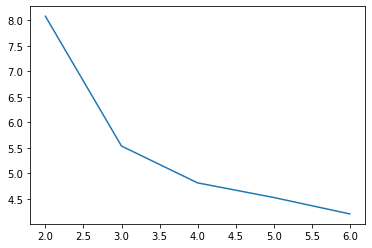

In [104]:
kmeans = Kmeans()
scores = []
for k in range(2, 7):
    kmeans.fit(data, k, track_history = True)
    scores.append(kmeans.evaluate(data))
plt.plot(range(2, 7), scores)

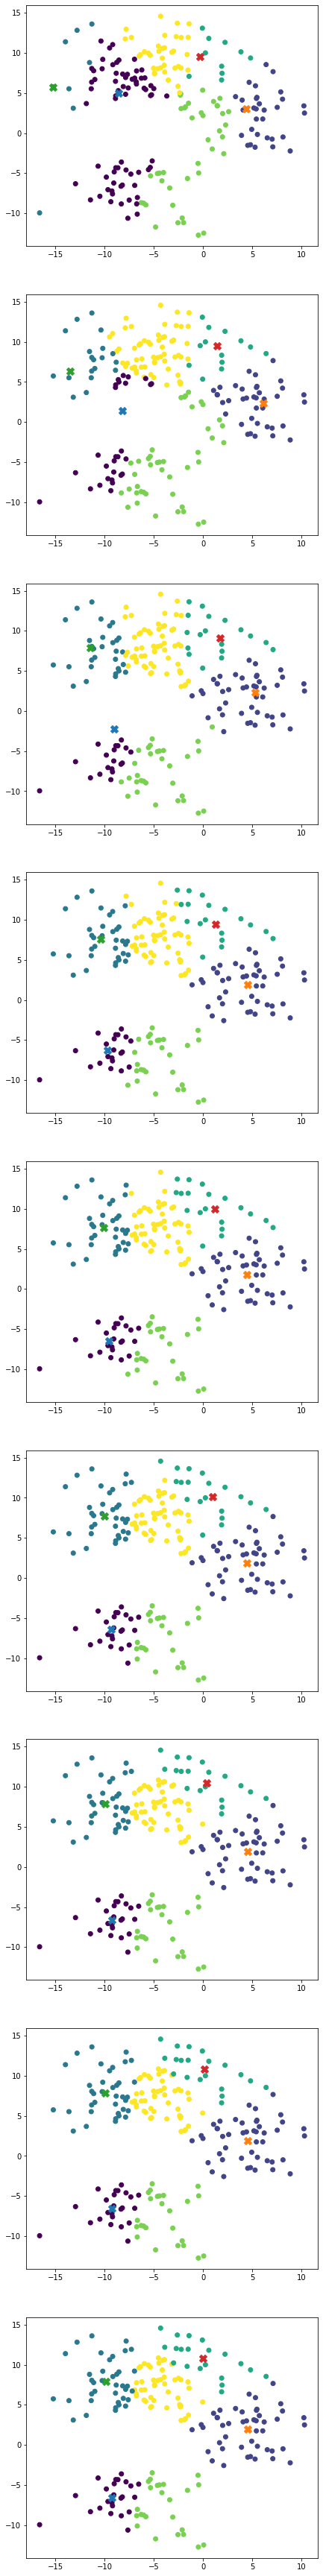

In [105]:
cluster_number = 4
fig, axs = plt.subplots(kmeans.iters_count - 1)
fig.set_figheight(7 * (kmeans.iters_count - 1))
fig.set_figwidth(7)

for i in range(kmeans.iters_count - 1):
    axs[i].scatter(data[:, 0], data[:, 1], c=kmeans.history['clusters'][i])
    for k in range(cluster_number):
        axs[i].scatter([kmeans.history['centroids'][i][k][0]],
                       [kmeans.history['centroids'][i][k][1]],
                       s=100,
                       marker='X')